#Question 5

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Question 5_1
titanic_data = pd.read_csv('titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Question 5_2
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic_data = titanic_data.dropna()

In [ ]:
#Question 5_3
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [ ]:
#Question 5_4
titanic_data = pd.get_dummies(titanic_data, columns=['Sex','Embarked'])

In [ ]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [ ]:
#Question 5_5
x = titanic_data.loc[:, titanic_data.columns!='Survived']
y = titanic_data.Survived

In [ ]:
#Question 5_6
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [ ]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

x_train shape:  (498, 8)
y_train shape:  (498,)


In [ ]:
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_test shape:  (214, 8)
y_test shape:  (214,)


In [ ]:
#Question 5_7
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train , y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
print('accuarcy on train: ', accuracy_score(y_train, y_pred_train))

accuarcy on train:  0.9939759036144579


In [ ]:
print('accuarcy on test: ', accuracy_score(y_test, y_pred_test))

accuarcy on test:  0.794392523364486


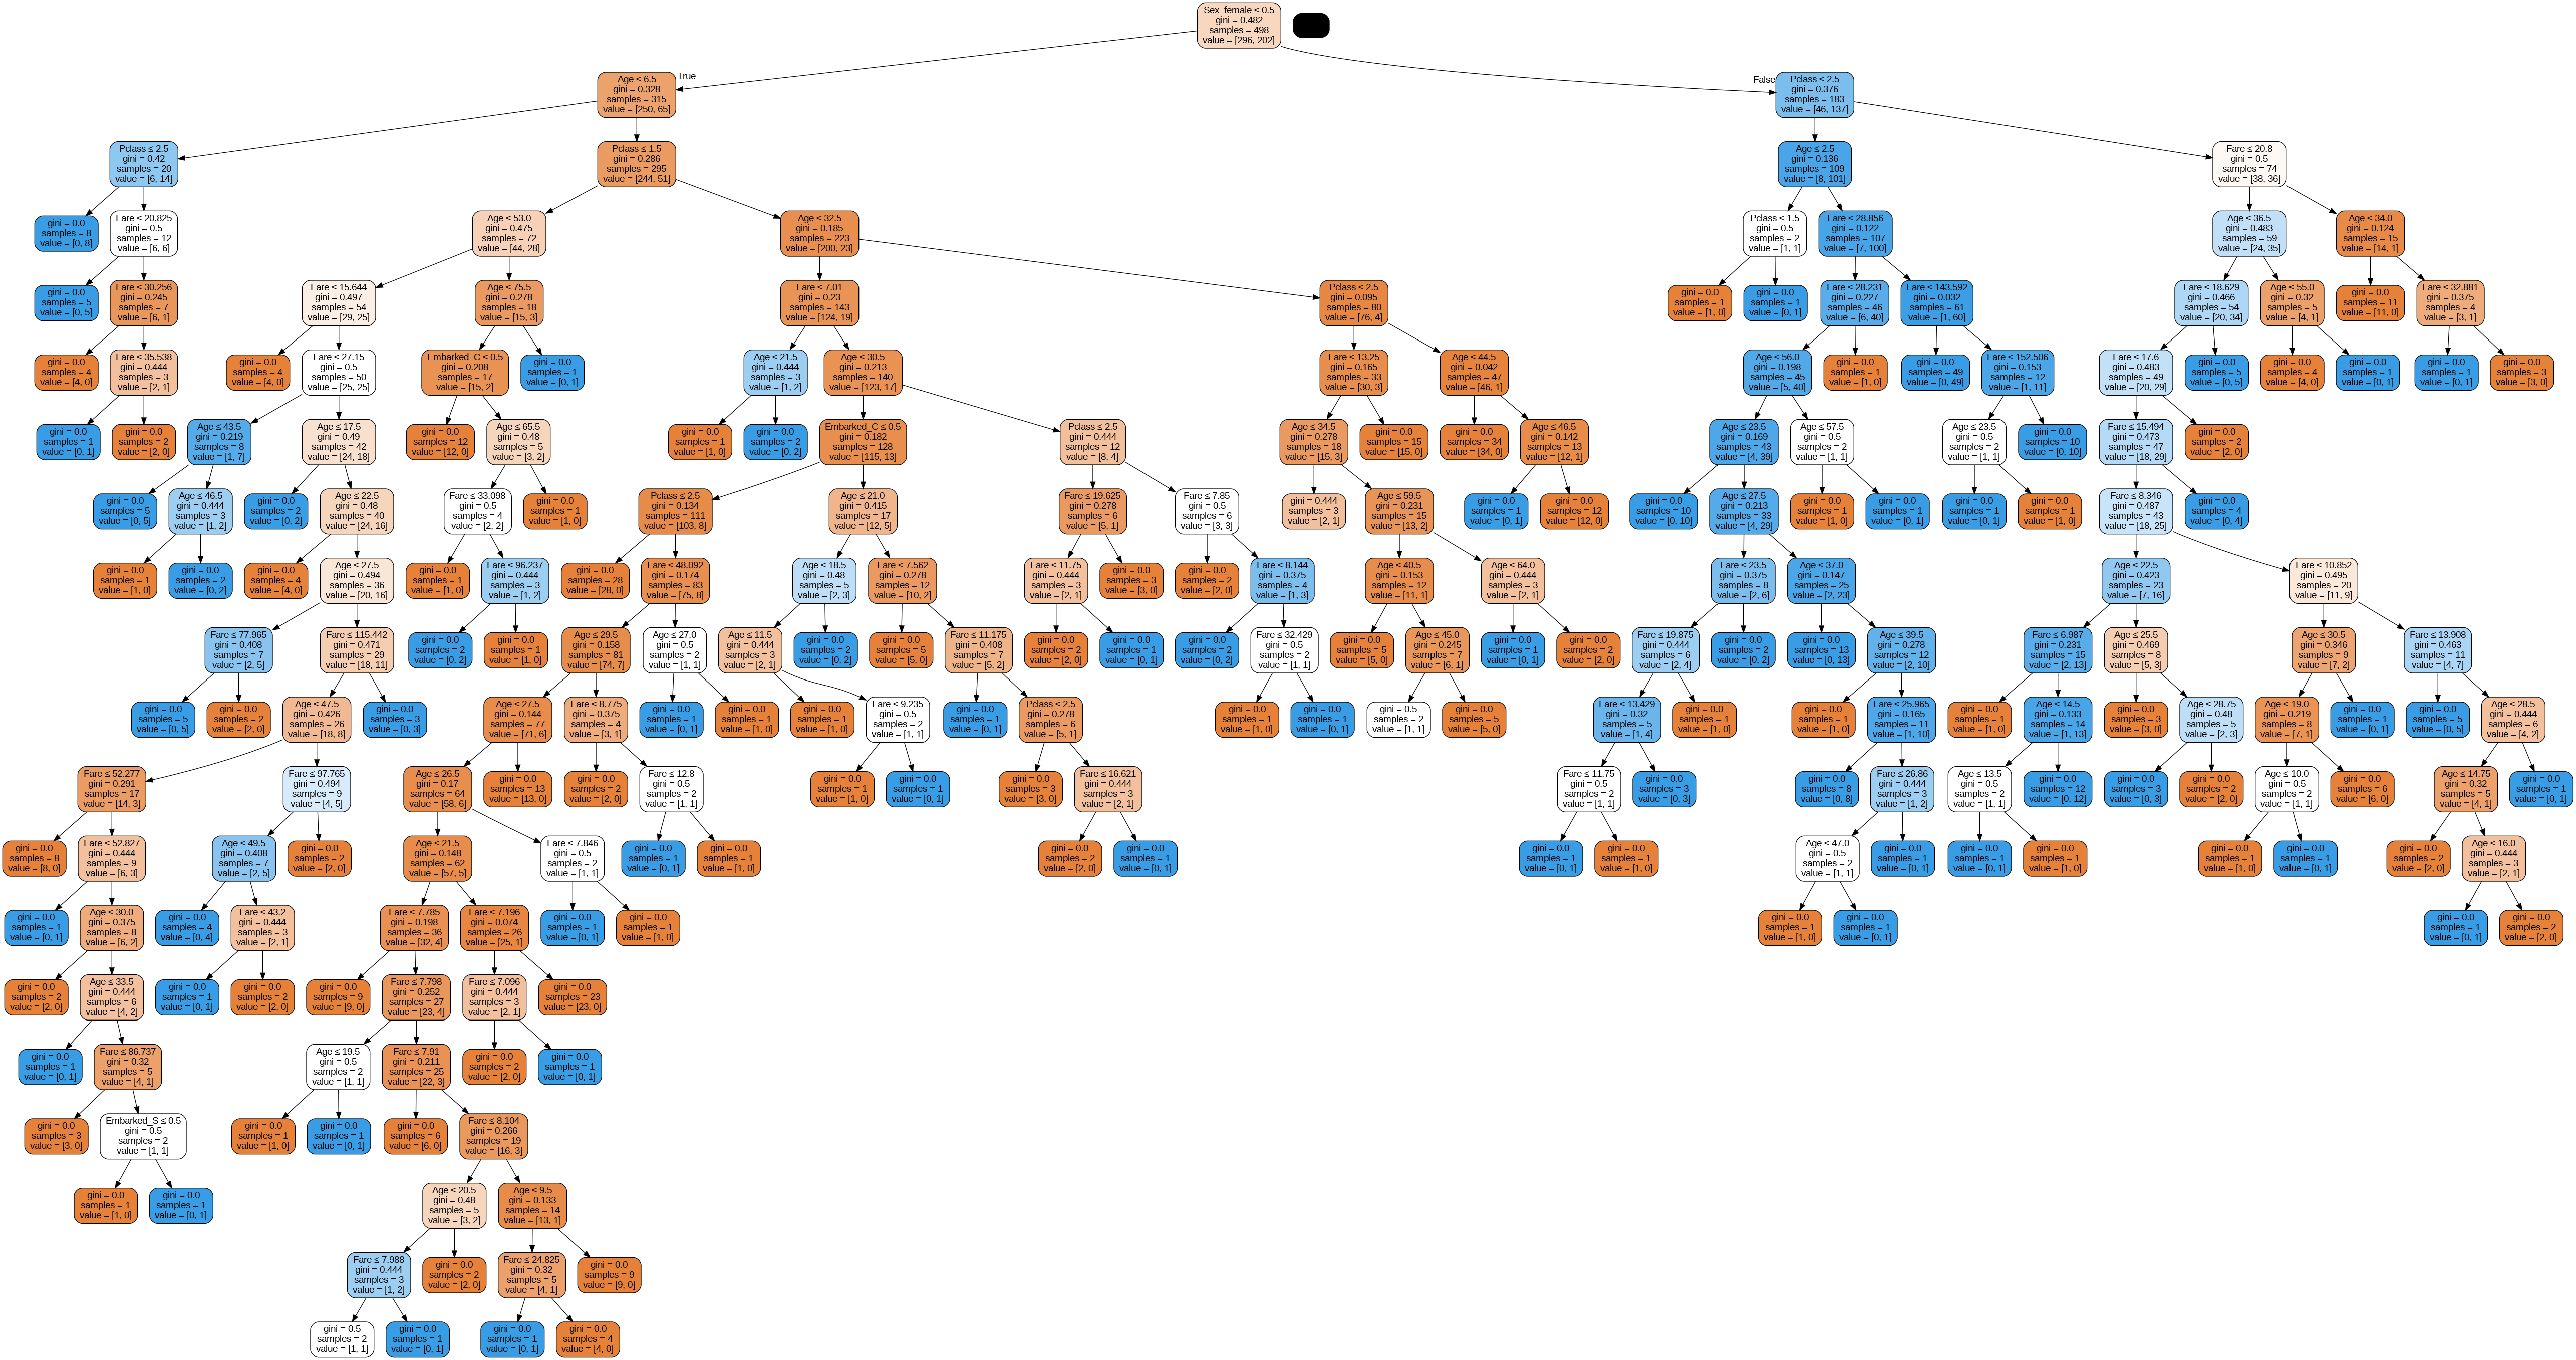

In [ ]:
#Question 5_8
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                                special_characters=True, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [ ]:
#Question 5_9

<div dir = 'rtl'>
بله چون دقت داده های تست خیلی نسبت به داده های آموزشی کم شده به این صورت که دقت داده های آموزشی 99 درصد اما داده های تست 79 درصد است پس overfitting رخ داده است. راه حل استفاده از روش های fine tuning و یا روش تصمیم گیری جمعی مانند random forrest است.
البته راه حل های دیگری مانند زیاد کردن داده و ویژگی های مفید، در بعضی مواقع کاهش ابعاد و یک پیش پردازش و cross validation خوب نیز در کم شدن overfitting تاثیر دارد. 
روش دیگر میتواند استفاده از هرس درخت تصمیم باشد. مشابه این کار را grid search برای ما انجام داده است.
<div>

In [ ]:
#Question 5_10
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

In [ ]:
confusion_matrix.index = ['True Died', 'True Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']

In [ ]:
print(confusion_matrix)

               Predicted Died  Predicted Survived
True Died                 106                  22
True Survived              22                  64


In [ ]:
#Question 5_11
from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(2,10), 'min_samples_leaf':range(1,20)}
tree_model = tree.DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(tree_model, params, cv=10, refit=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 20)})

In [ ]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 9}

In [ ]:
y_pred_train = grid_search.predict(x_train)
y_pred_test = grid_search.predict(x_test)

In [ ]:
print('best score train: ', accuracy_score(y_train, y_pred_train))

best score train:  0.8192771084337349


In [ ]:
print('best score test: ', accuracy_score(y_test, y_pred_test))

best score test:  0.8084112149532711


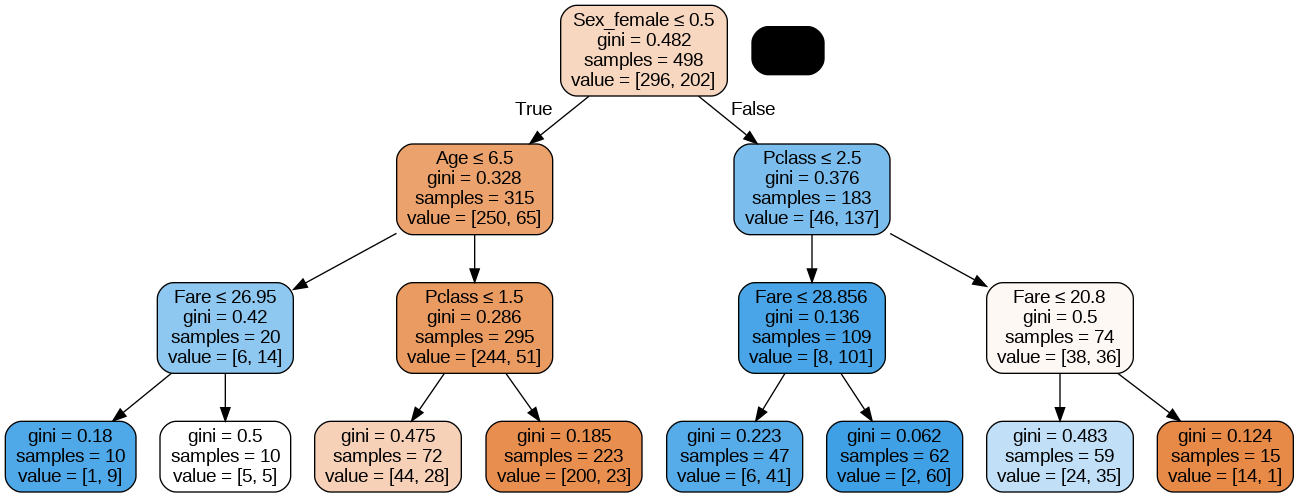

In [ ]:
#Question 5_12
best_model = grid_search.best_estimator_ 

dot_tree = tree.export_graphviz(best_model, out_file=None, filled=True, rounded=True,
                                special_characters=True, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['True Died', 'True Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

               Predicted Died  Predicted Survived
True Died                 116                  12
True Survived              29                  57


In [ ]:
#Question 5_13
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(random_state=0)
randomforest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Question 5_14
y_pred_train = model.predict(x_train)
print('best score train: ', accuracy_score(y_train, y_pred_train))

best score train:  0.9939759036144579


In [ ]:
y_pred_test = model.predict(x_test)
print('best score test: ', accuracy_score(y_test, y_pred_test))

best score test:  0.794392523364486


In [ ]:
#Question 5_15
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params ={
    'max_depth':range(2,10),
    'min_samples_split':range(2,11),
    'min_samples_leaf' : range(1,11),
    'bootstrap': [True, False],
    'n_estimators' : [100,400,700,1500],
    'criterion':['gini','entropy']
}

In [ ]:
random_search = RandomizedSearchCV(randomforest_model, params, n_iter=50, n_jobs=-1)
random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 10),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': [100, 400, 700, 1500]})

In [ ]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'criterion': 'gini',
 'bootstrap': True}

In [ ]:
y_pred_train = random_search.predict(x_train)
print('best score train: ', accuracy_score(y_train, y_pred_train))

best score train:  0.891566265060241


In [ ]:
y_pred_test = random_search.predict(x_test)
print('best score test: ', accuracy_score(y_test, y_pred_test))

best score test:  0.7990654205607477


In [ ]:
#Question 5_16

<div dir = 'rtl'>در کل بستگی به درختی داشت که ساخته است. در بعضی موارد پارامتر gini بهتر عمل میکرد و در بعضی موارد entropy. اما حداقل در آخرین اجرا که در نتایج همین فایل معلوم است، معیار gini موثرتر بوده است.
<div>

#Question 6

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Iris.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state=1)

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

cv = LeaveOneOut()
scores = cross_val_score(svclassifier, X_train, y_train, cv=cv, n_jobs=-1)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.]


In [ ]:
from numpy import mean

print("Cross-validation score mean:", mean(scores))

Cross-validation score mean: 0.9583333333333334


In [ ]:
svclassifier.fit(X_train, y_train)
svclassifier.score(X_test, y_test)

0.9666666666666667

In [ ]:
pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Question 6_1
from sklearn.metrics import accuracy_score

e = []
for d in range(1, 11):
  svclassifier = SVC(kernel='poly', degree=d)
  svclassifier.fit(X_train, y_train)
  pred = svclassifier.predict(X_test)
  e.append(1-accuracy_score(pred, y_test))

Text(0, 0.5, 'Error rate')

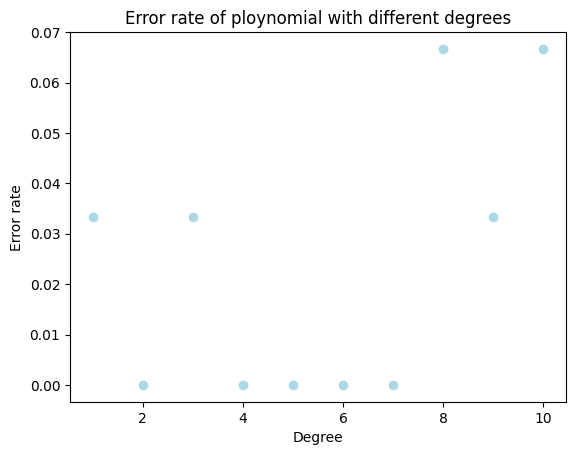

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(list(range(1, 11)), e, c='lightblue')
plt.title('Error rate of ploynomial with different degrees')
plt.xlabel('Degree')
plt.ylabel('Error rate')

In [ ]:
#Question 6_2
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [ ]:
pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Question 7

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Question 7_1
titanic_data = pd.read_csv('titanic.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [6]:
titanic_data = titanic_data.dropna()

In [7]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [8]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [9]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex','Embarked'])

In [10]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [11]:
x = titanic_data.loc[:, titanic_data.columns!='Survived']
y = titanic_data.Survived

In [12]:
#Question 7_2
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [13]:
#Question 7_3
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier().fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
nn_model.score(x_test, y_test)

0.794392523364486

In [15]:
#Question 7_4
from sklearn.preprocessing import StandardScaler

sclaler = StandardScaler()

In [16]:
x_train = sclaler.fit_transform(x_train)
x_test = sclaler.fit_transform(x_test)

In [17]:
nn_model2 = MLPClassifier().fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
nn_model2.score(x_test, y_test)

0.8130841121495327

In [19]:
#Question 7_5
from sklearn.model_selection import GridSearchCV

params = {'solver': ['adam', 'sgd'],  
          'learning_rate_init': 10.0 ** -np.arange(1, 5), 
          'hidden_layer_sizes':np.arange(100, 1000, 100),
          'activation' : ['identity' , 'tanh' , 'relu']
          }

In [20]:
grid_search = GridSearchCV(MLPClassifier(max_iter=2000), params, cv=10, n_jobs = -1, refit=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['identity', 'tanh', 'relu'],
                         'hidden_layer_sizes': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'learning_rate_init': array([0.1   , 0.01  , 0.001 , 0.0001]),
                         'solver': ['adam', 'sgd']})

In [21]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.1,
 'solver': 'adam'}

In [22]:
grid_search.score(x_train, y_train)

0.8493975903614458

In [23]:
grid_search.score(x_test, y_test)

0.8177570093457944

In [24]:
#Question 7_6
from sklearn.metrics import confusion_matrix

y_pred = grid_search.predict(x_test)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_matrix.index = ['True Died', 'True Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

               Predicted Died  Predicted Survived
True Died                 117                  11
True Survived              28                  58


In [25]:
from sklearn.metrics import classification_report

target_names = ['Died', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Died       0.81      0.91      0.86       128
    Survived       0.84      0.67      0.75        86

    accuracy                           0.82       214
   macro avg       0.82      0.79      0.80       214
weighted avg       0.82      0.82      0.81       214



#Question 8

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Iris.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sclaler = StandardScaler()
X_train = sclaler.fit_transform(X_train)
X_test = sclaler.fit_transform(X_test)

In [ ]:
#Question 8_1
from sklearn.neighbors import KDTree
from scipy.stats import mode

def KDTree_KNN(X_train, X_test, k):
  kd = KDTree(X_train, metric='euclidean')
  distances, indices = kd.query(X_test, k = k)
  
  pred = []
  for item in indices:
    pred.append(mode( [y[j] for j in item ])[0][0])
    
  return pred

In [ ]:
from sklearn.metrics import accuracy_score

e=[]
for k in range(1, 31):
  pred = KDTree_KNN(X_train, X_test, k)
  e.append(1-accuracy_score(pred, y_test))

<ipython-input-84-3342c718024f>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [y[j] for j in item ])[0][0])
<ipython-input-84-3342c718024f>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [y[j] for j in item ])[0][0])
<ipy

The least error rate we can get is: 0.633 with K equal to:  26


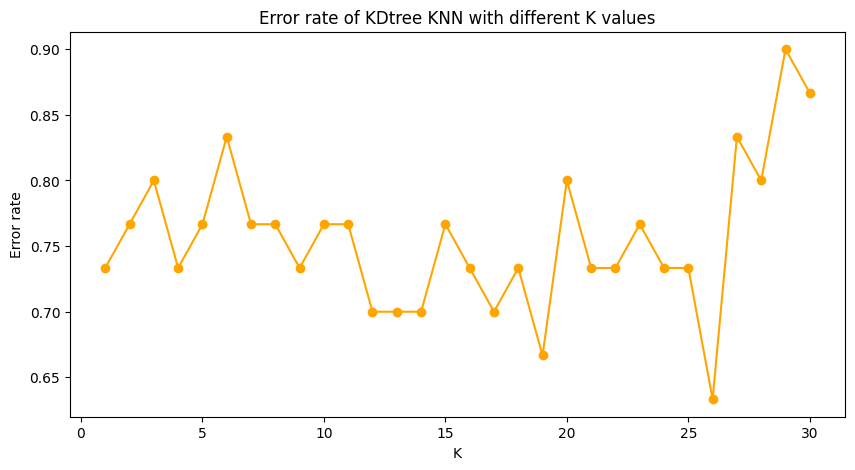

In [ ]:
print('The least error rate we can get is: {:.3}'.format(min(e)), 'with K equal to: ', e.index(min(e))+1)
plt.figure(figsize=(10, 5))
plt.title('Error rate of KDtree KNN with different K values')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.plot(list(range(1, 31)), e, c='orange', marker= 'o')

In [ ]:
pred = KDTree_KNN(X_train, X_test, 26)

<ipython-input-84-3342c718024f>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [y[j] for j in item ])[0][0])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[6 5 0]
 [8 5 0]
 [6 0 0]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.30      0.55      0.39        11
           2       0.50      0.38      0.43        13
           3       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.27      0.31      0.27        30
weighted avg       0.33      0.37      0.33        30



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Question 8_2
from sklearn.neighbors import BallTree

def BallTree_KNN(X_train, X_test, k):
  ball = BallTree(X_train, metric='euclidean')
  distances, indices = ball.query(X_test, k = k)

  pred = []
  for item in indices:
    pred.append(mode( [ y[j] for j in item ])[0][0])

  return pred

In [ ]:
e=[]
for k in range(1, 31):
    pred = BallTree_KNN(X_train, X_test, k)
    e.append(1-accuracy_score(pred, y_test))

<ipython-input-90-9e4fd06a9609>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [ y[j] for j in item ])[0][0])
<ipython-input-90-9e4fd06a9609>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [ y[j] for j in item ])[0][0])
<i

The least error rate we can get is: 0.633 with K equal to:  26


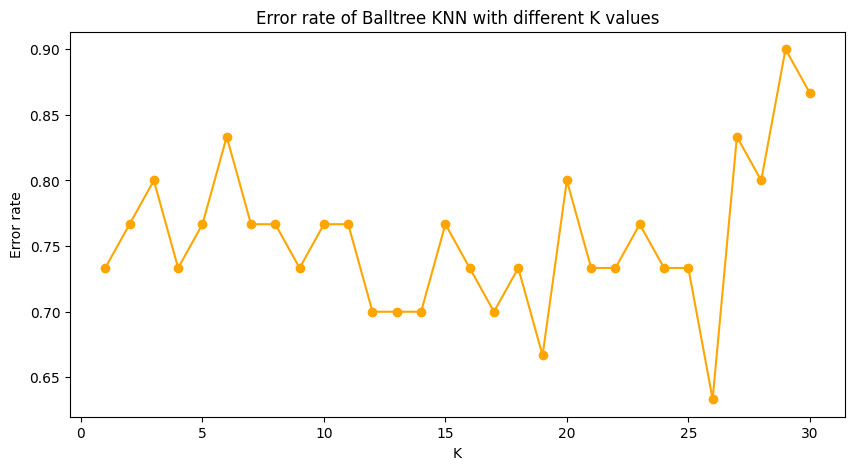

In [ ]:
print('The least error rate we can get is: {:.3}'.format(min(e)), 'with K equal to: ', e.index(min(e))+1)
plt.figure(figsize=(10, 5))
plt.title('Error rate of Balltree KNN with different K values')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.plot(list(range(1, 31)), e, c='orange', marker= 'o')

In [ ]:
pred = BallTree_KNN(X_train, X_test, 26)

<ipython-input-90-9e4fd06a9609>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred.append(mode( [ y[j] for j in item ])[0][0])


In [ ]:
print(confusion_matrix(y_test, pred))

[[6 5 0]
 [8 5 0]
 [6 0 0]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.30      0.55      0.39        11
           2       0.50      0.38      0.43        13
           3       0.00      0.00      0.00         6

    accuracy                           0.37        30
   macro avg       0.27      0.31      0.27        30
weighted avg       0.33      0.37      0.33        30



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
